# Centrality Measures - Star Centrality

###### In this notebook I develop a new* centrality measure.
###### The motivation for this new measure is to help the characterization of biological networks. The literature shows that these networks have a negative assortativity, with some 'hub and spoke' pattern on some parts.

*no similar measurement were found.

In [1]:
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def starHubCentralityFunction(G):
    starHubCentrality={}
    for node,clustering in dict(nx.clustering(G)).items():
        #Cluster 0 became 1,and cluster 1 became 1. Is the inverse of cluster 0
        antCluster = (clustering-1)*-1
        #Multiply the antCluster by the number of the neighbors thar are leafs
        leafs=[x for x in dict(G[node]).keys() if G.degree(x) ==1]
        starCoeficient = antCluster*len(leafs)
        starHubCentrality[node]=starCoeficient

    return starHubCentrality

def starHubAndLeafCentralityFunction(G):
    #Calculate the starCentrality for Hubs
    starCoeficient = starHubCentralityFunction(G)
    #find the nodes that are leafs
    leafs=[item[0] for item in dict(G.degree).items() if(item[1])==1]
    for node in leafs:
        #Since this is a leaf, get the 'father' (hub) centrality
        father=list(dict(G[node]).keys())[0]
        #update the leaf with the father's value
        starCoeficient[node] = starCoeficient[father]

    return starCoeficient
    
def networkMeasuresAsDF(G):
    #Extract the measures
    degree = nx.degree(G)
    closeness = nx.closeness_centrality(G)
    betweeness = nx.betweenness_centrality(G)
    clustering = nx.clustering(G)
    starHub = starHubCentralityFunction(G)
    starHubAndLeaf = starHubAndLeafCentralityFunction(G)

    #Create a dataframe using the measures 
    networkMeasures = pd.DataFrame(pd.DataFrame.from_dict(dict(degree),orient='index',columns=['degree']))

    df = pd.DataFrame.from_dict(dict(closeness),orient='index',columns=['closeness'])
    networkMeasures=pd.concat([networkMeasures,df],axis=1)

    df = pd.DataFrame.from_dict(dict(betweeness),orient='index',columns=['betweeness'])
    networkMeasures=pd.concat([networkMeasures,df],axis=1)

    df = pd.DataFrame.from_dict(dict(clustering),orient='index',columns=['clustering'])
    networkMeasures=pd.concat([networkMeasures,df],axis=1)

    df = pd.DataFrame.from_dict(dict(starHub),orient='index',columns=['starHub'])
    networkMeasures=pd.concat([networkMeasures,df],axis=1)

    df = pd.DataFrame.from_dict(dict(starHubAndLeaf),orient='index',columns=['starHubAndLeaf'])
    networkMeasures=pd.concat([networkMeasures,df],axis=1)
    
    return networkMeasures

def plotMeasures(G):
    networkMeasures = networkMeasuresAsDF(G)
    pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(8,4),dpi=200)                        
    for i,col in enumerate(networkMeasures.columns):
        plt.subplot(2,3,i+1)
        plt.title(col,fontsize=8)
        measure =  list(networkMeasures[col])
        vmin = min(measure)
        vmax = max(measure)
        cmap = plt.get_cmap('plasma_r')
        nx.draw(G, pos, with_labels=0,node_size=25,font_size=4,font_color='black',edge_color='gray', width=0.5,node_color=measure,cmap=cmap, vmin=vmin*0.8, vmax=vmax*1.2)
    plt.show()

In [3]:
#1 Network
tree = nx.generators.balanced_tree(2,5)

#2 Network
scaleFree1 = nx.barabasi_albert_graph(35,1,seed=444444)
leafsOf2=[x for x in dict(scaleFree1[2]).keys() if scaleFree1.degree(x) ==1]
for i in leafsOf2:
    for j in leafsOf2:
        if(i!=j):
            scaleFree1.add_edge(i,j)         
scaleFree1.add_edge(3,35)
scaleFree1.add_edge(3,36)

#3 Network - This network was developed by Isabela Forti. Her GitHub:
isaNet = nx.Graph()
isaNet.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'U'), ('B', '14'), ('C', 'D'), ('C', '3'), ('C', '4'), ('D', 'F'), ('D', '15'), ('F', 'G'), ('F', 'I'), ('F', 'H'), ('F', '15'), ('G', 'H'), ('G', 'I'), ('G', '5'), ('G', '6'), ('H', 'I'), ('H', 'M'), ('H', '11'), ('I', 'E'), ('E', 'J'), ('E', 'K'), ('E', 'L'), ('J', 'S'), ('J', 'U'), ('J', 'T'), ('K', 'P'), ('K', 'R'), ('K', 'Q'), ('L', 'M'), ('L', 'O'), ('L', 'N'), ('M', 'N'), ('M', 'O'), ('M', '11'), ('N', 'O'), ('N', '7'), ('N', '8'), ('O', 'P'), ('O', '12'), ('P', 'Q'), ('P', 'R'), ('P', '12'), ('Q', 'R'), ('Q', '9'), ('Q', '10'), ('R', 'S'), ('R', '13'), ('S', 'T'), ('S', 'U'), ('S', '13'), ('T', 'U'), ('T', '1'), ('T', '2'), ('U', '14')])

#4 Network 
scaleFree2=nx.dorogovtsev_goltsev_mendes_graph(4)

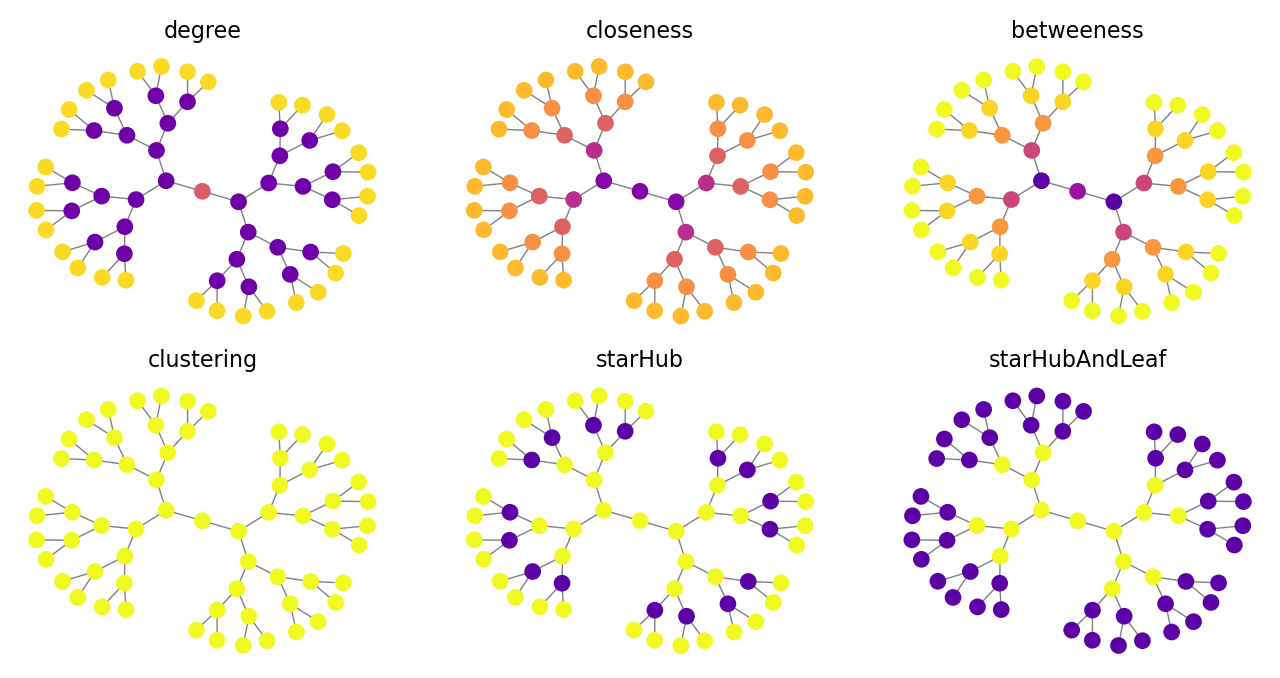

In [4]:
plotMeasures(tree)

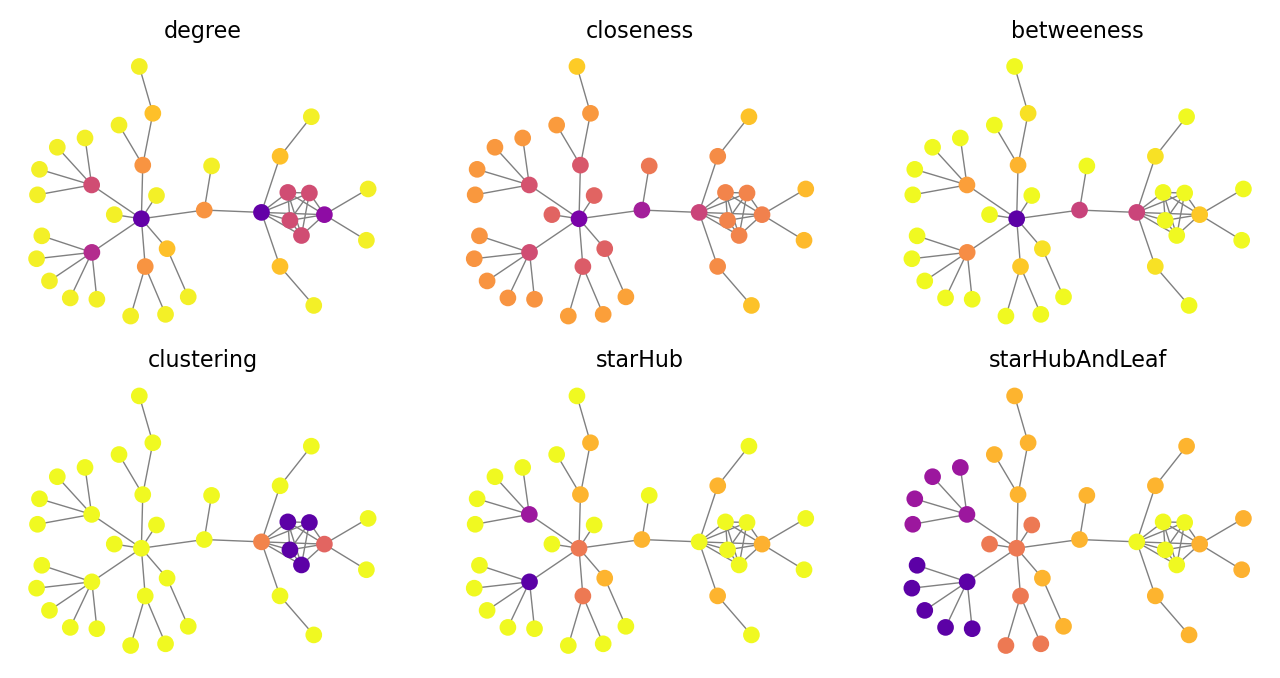

In [5]:
plotMeasures(scaleFree1)

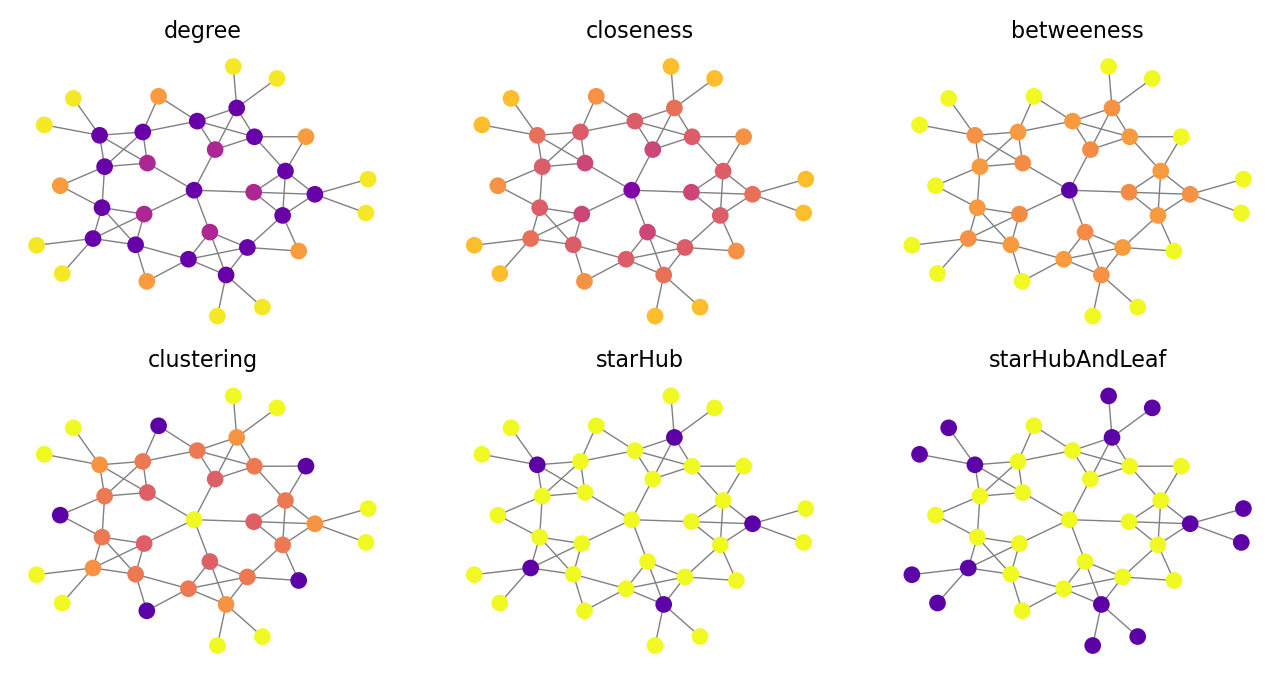

In [6]:
plotMeasures(isaNet)

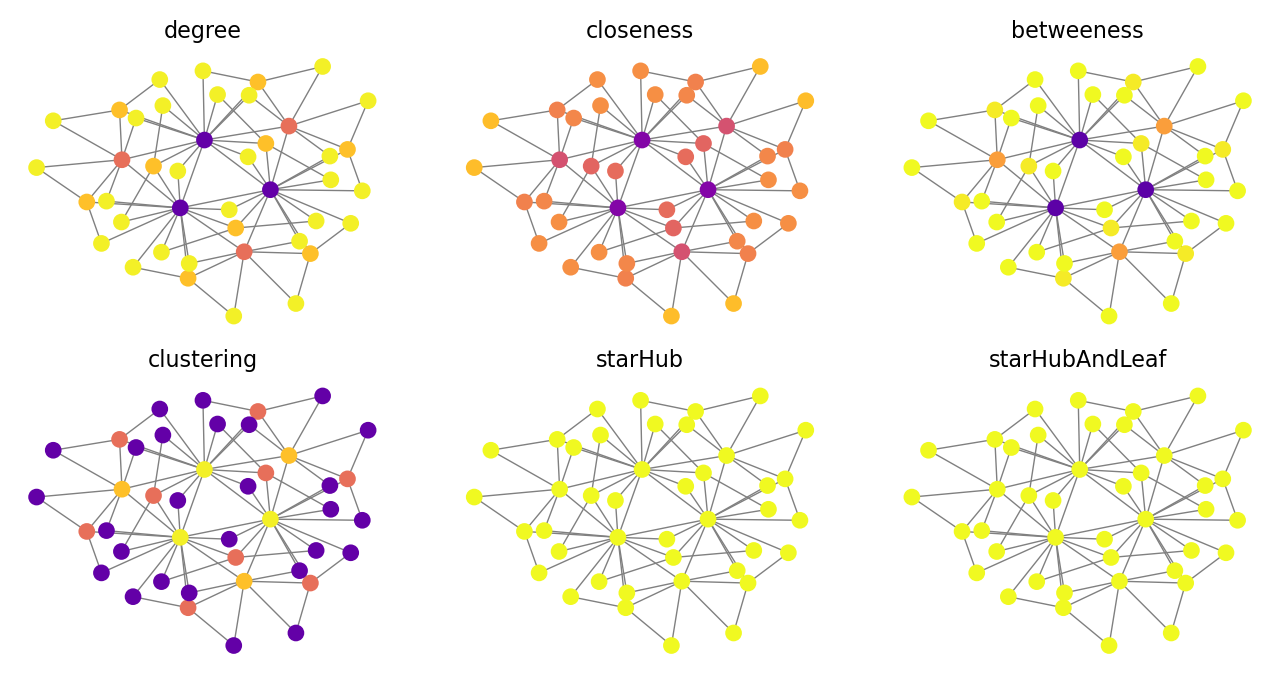

In [7]:
plotMeasures(scaleFree2)